# Uge 10-13

## Vi har arbejdet med Linær regression og decisionTree. Vi har trænet to modeller med hver fremgangsmåde, og sammenlignet resultatet. 

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load og frasorter Pet data

In [ ]:
# 1. Indlæs CSV-fil
file_path = "data/train.csv"
df = pd.read_csv(file_path)

# 2. Undersøg data
print("Raw data:")
print(df.head())  # Se de første rækker
print(df.info())  # Se datatype og manglende værdier

# 3. Definér features (X) og target (y)
X = df.drop(columns=["Pawpularity", "Id"])  # Brug alle kolonner undtagen disse
y = df["Pawpularity"]

# 4. Opdel i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Skalér data (valgfrit, afhængigt af model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Raw data:
                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0

### Træn modellerne

In [48]:
# 6. Træn modellerne
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Decision Tree Regression
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# 7. Evaluér modellerne
print("Model evaluation:")

# Linear Regression
print("\nLinear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))

# Decision Tree Clasiification
print("\nDecision Tree Clasiification:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R^2 Score:", r2_score(y_test, y_pred_tree))

Model evaluation:

Linear Regression:
Mean Absolute Error: 15.393765318722549
Mean Squared Error: 432.3596413237214
R^2 Score: -0.008630114239557063

Decision Tree Clasiification:
Mean Absolute Error: 17.659791503194707
Mean Squared Error: 566.7009303889698
R^2 Score: -0.32202816712469495


### Test Modellerne på testdata

In [49]:
# Load test data
test_file_path = "data/test.csv"
df_test = pd.read_csv(test_file_path)

# Fjern "Id" kolonnen fra testdata, hvis den findes
X_test = df_test.drop(columns=["Id"], errors="ignore") 

# Skalér testdata
X_test_scaled = scaler.transform(X_test)  # Brug den samme scaler som til træningsdata

# Lav forudsigelser på testdata
linearpredictions = linear_model.predict(X_test_scaled)
tree_predictions = decision_tree_model.predict(X_test_scaled)

# Vis forudsigelser
df_test["Predicted Pawpularity"] = linearpredictions
print("Linear Regression Predictions:")
print(df_test[["Id", "Predicted Pawpularity"]] if "Id" in df_test.columns else df_test[["Predicted Pawpularity"]])

df_test["Predicted Pawpularity"] = tree_predictions
print("Decision Tree Predictions:")
print(df_test[["Id", "Predicted Pawpularity"]] if "Id" in df_test.columns else df_test[["Predicted Pawpularity"]])





Linear Regression Predictions:
                                 Id  Predicted Pawpularity
0  4128bae22183829d2b5fea10effdb0c3              31.396775
1  43a2262d7738e3d420d453815151079e              39.408467
2  4e429cead1848a298432a0acad014c9d              39.321989
3  80bc3ccafcc51b66303c2c263aa38486              25.938787
4  8f49844c382931444e68dffbe20228f4              33.632920
5  b03f7041962238a7c9d6537e22f9b017              42.256275
6  c978013571258ed6d4637f6e8cc9d6a3              32.635783
7  e0de453c1bffc20c22b072b34b54e50f              29.427396
Decision Tree Predictions:
                                 Id  Predicted Pawpularity
0  4128bae22183829d2b5fea10effdb0c3                     26
1  43a2262d7738e3d420d453815151079e                     43
2  4e429cead1848a298432a0acad014c9d                     37
3  80bc3ccafcc51b66303c2c263aa38486                     41
4  8f49844c382931444e68dffbe20228f4                     30
5  b03f7041962238a7c9d6537e22f9b017                     2

### Visualisering

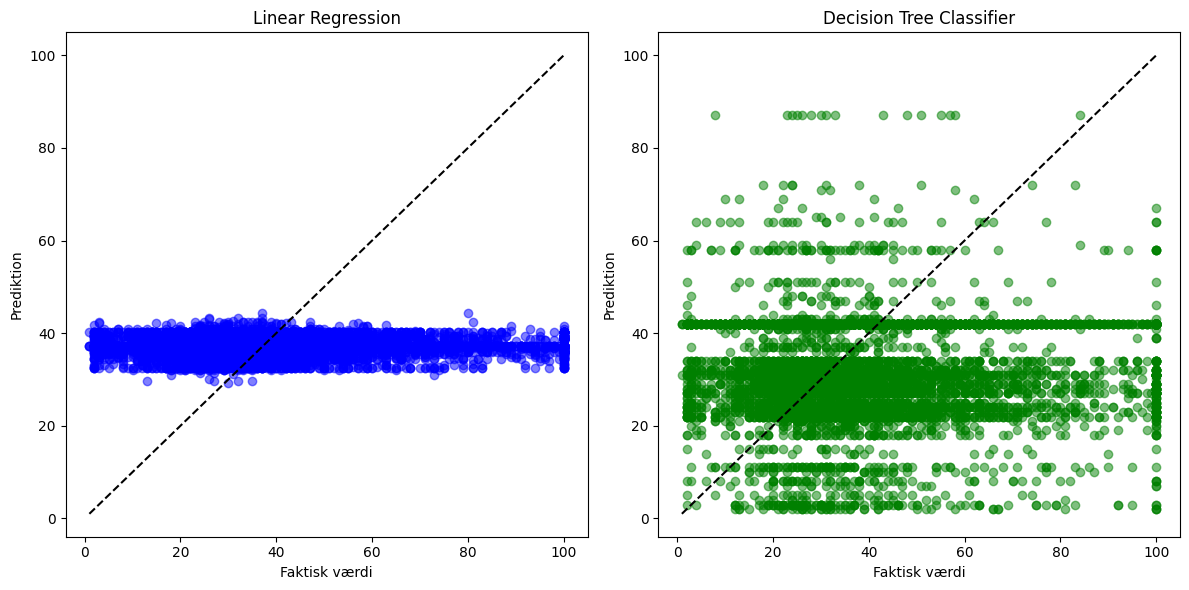

In [50]:
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Faktisk værdi')
plt.ylabel('Prediktion')
plt.title('Linear Regression')

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Faktisk værdi')
plt.ylabel('Prediktion')
plt.title('Decision Tree Classifier')

plt.tight_layout()
plt.show()

# Logistisk regression

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123
)

# 3. Skalér features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Træn logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# 5. Forudsig og evaluer
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# Confusion Matrix

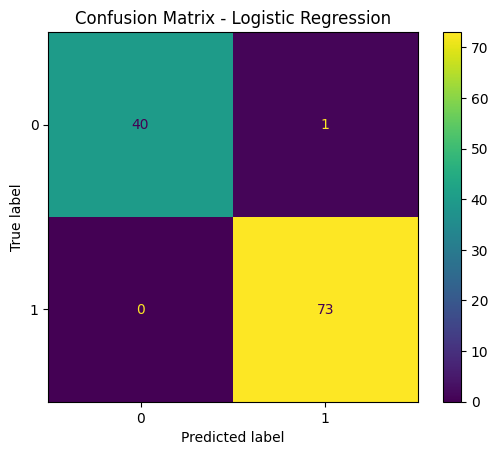

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Beregn confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vis confusion matrix som plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# decision tree

Decision Tree Accuracy: 0.96
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.96      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



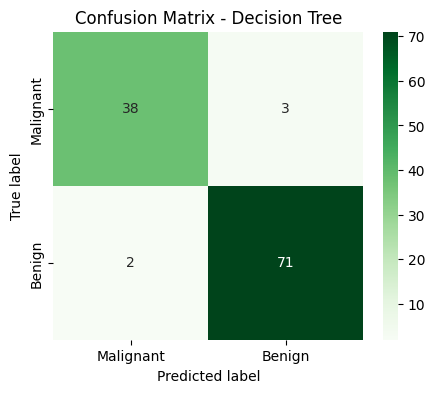

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Træn Decision Tree model på samme data som logistisk regression, nu med max_depth
dt_model = DecisionTreeClassifier(random_state=123, max_depth=10000)
dt_model.fit(X_train_scaled, y_train)

# Forudsig og evaluer
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:")
print(dt_report)

# Visualiser confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# precision_score, recall_score, f1_score

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Beregn precision, recall og f1-score for Decision Tree
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.96
Recall: 0.97
F1-score: 0.97


# Cross validation

In [76]:
from sklearn.model_selection import cross_val_score

# Brug DecisionTreeClassifier med samme parametre som tidligere
dt_model = DecisionTreeClassifier(random_state=123, max_depth=10000)

# 5-fold cross-validation (cv=5)
scores_5 = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print("5-fold CV scores:", scores_5)
print("Gennemsnitlig accuracy (cv=5):", scores_5.mean())

# Eksperimenter med cv=3 og cv=10
scores_3 = cross_val_score(dt_model, X_train_scaled, y_train, cv=3)
print("3-fold CV scores:", scores_3)
print("Gennemsnitlig accuracy (cv=3):", scores_3.mean())

scores_10 = cross_val_score(dt_model, X_train_scaled, y_train, cv=10)
print("10-fold CV scores:", scores_10)
print("Gennemsnitlig accuracy (cv=10):", scores_10.mean())

5-fold CV scores: [0.9010989  0.93406593 0.92307692 0.91208791 0.91208791]
Gennemsnitlig accuracy (cv=5): 0.9164835164835164
3-fold CV scores: [0.92105263 0.91447368 0.90728477]
Gennemsnitlig accuracy (cv=3): 0.914270361333798
10-fold CV scores: [0.95652174 0.97826087 0.97826087 0.80434783 0.97826087 0.97777778
 0.95555556 0.91111111 0.97777778 0.88888889]
Gennemsnitlig accuracy (cv=10): 0.9406763285024156


# logstisk regression & penalty

In [80]:
from sklearn.linear_model import LogisticRegression

# Uden regularisering (penalty=None)
logreg_none = LogisticRegression(penalty=None, max_iter=500, solver="lbfgs")
logreg_none.fit(X_train_scaled, y_train)
print("Uden regularisering (penalty=None):", logreg_none.score(X_test_scaled, y_test))

# Med L1-regularisering (penalty='l1')
logreg_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=500)
logreg_l1.fit(X_train_scaled, y_train)
print("Med L1-regularisering (penalty='l1'):", logreg_l1.score(X_test_scaled, y_test))

# Med L2-regularisering (penalty='l2')
logreg_l2 = LogisticRegression(penalty="l2", solver="lbfgs", max_iter=500)
logreg_l2.fit(X_train_scaled, y_train)
print("Med L2-regularisering (penalty='l2'):", logreg_l2.score(X_test_scaled, y_test))



Uden regularisering (penalty=None): 0.9824561403508771
Med L1-regularisering (penalty='l1'): 0.9912280701754386
Med L2-regularisering (penalty='l2'): 0.9912280701754386


# sammenlign random forrest med enkeltstående beslutningstræer

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Træn RandomForestClassifier på samme data
rf_model = RandomForestClassifier(random_state=215125, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Forudsig og evaluer
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Sammenlign med enkeltstående beslutningstræ
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Random Forest Accuracy: 0.51
Decision Tree Accuracy: 0.96


# Uge 14

## Principal Component Analasys og Clustering

### Imports

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

### Load and Transformer BreastCancer Data

In [9]:
# Load data
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# MinMaxScaler data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA med 2 komponenter
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Andel af varians bevaret:", pca.explained_variance_ratio_)
print("Samlet varians bevaret:", sum(pca.explained_variance_ratio_))

Andel af varians bevaret: [0.53097689 0.1728349 ]
Samlet varians bevaret: 0.7038117901347682


### Visualiser breast cancer data

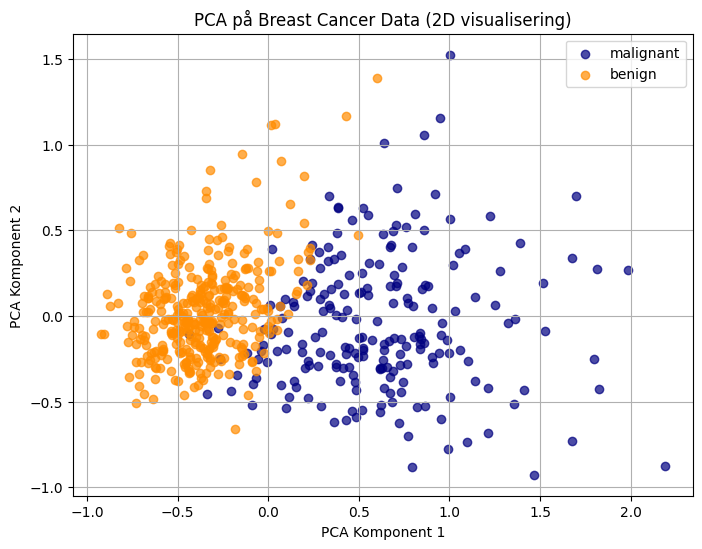

In [10]:
plt.figure(figsize=(8, 6))
colors = ['navy', 'darkorange']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_names[i], alpha=0.7, c=color)
plt.xlabel('PCA Komponent 1')
plt.ylabel('PCA Komponent 2')
plt.title('PCA på Breast Cancer Data (2D visualisering)')
plt.legend()
plt.grid(True)
plt.show()

### Agglomerative Clustering

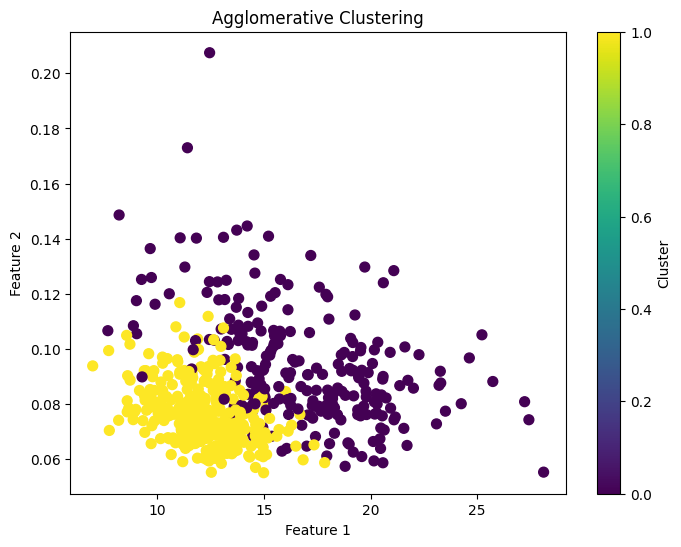

In [11]:
# Agglomerative clustering (2 klasser)
agglo = AgglomerativeClustering(n_clusters=2)
y_cluster = agglo.fit_predict(X_pca)

# Visualisering af agglomerative clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,-1], c=y_cluster, cmap='viridis', marker='o', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

### Accuracy score og Confusion Matrix

Accuracy: 0.9050966608084359


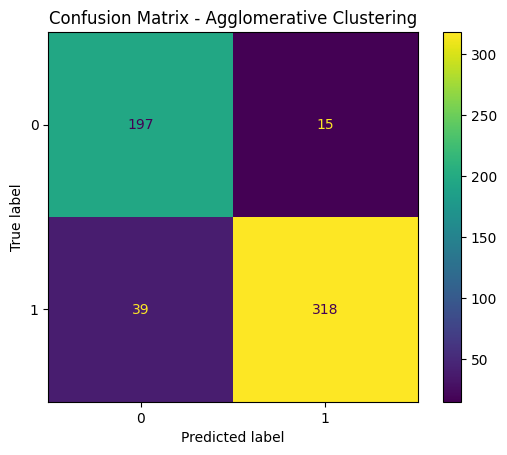

In [12]:
true_labels = y  # Brug de sande labels fra data

# Beregn accuracy
accuracy = accuracy_score(true_labels, y_cluster)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(true_labels, y_cluster)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Agglomerative Clustering")
plt.grid(False)
plt.show()

### Elbow-method

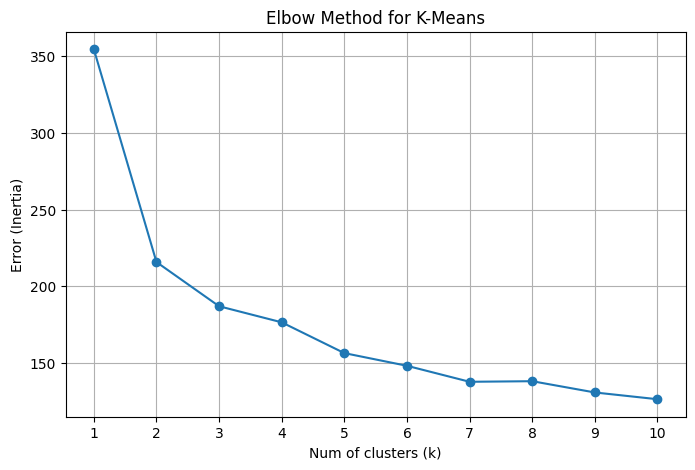

In [13]:
# Find optimal antal clusters (1-10)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Num of clusters (k)')
plt.ylabel('Error (Inertia)')
plt.title('Elbow Method for K-Means')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### K-means Clustering

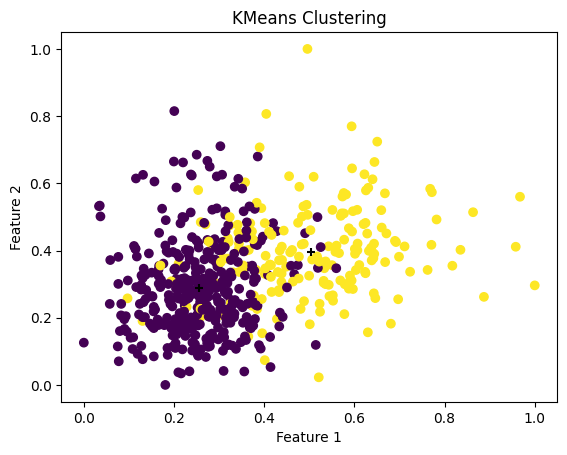

In [14]:
kmeans = KMeans(n_clusters=2)  # Definér KMeans med 2 clusters
y = kmeans.fit_predict(X_scaled)  # Fit modellen til data

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
c='black', marker='+')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Uge 15

## Her arbejder vi med et lille multilayer Nerual Netværk fra torch biblioteket
## Først træner vi en model på kun CSV, derefter på petfinder billeder

## Træn model på CSV

### Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
import torch.nn as nn

### Load csv data

In [16]:
# 1. Indlæs data
df = pd.read_csv("data/train.csv")
X = df.drop(columns=["Pawpularity", "Id"]).values
y = df["Pawpularity"].values.reshape(-1, 1)

# 2. Split + skalering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Konverter til tensors og DataLoader
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

### NN Model

In [17]:
modelcsv = nn.Sequential(
    nn.Linear(X.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

### Træning af model

In [18]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(modelcsv.parameters(), lr=0.01)
epochs = 100
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for xb, yb in train_loader:
        pred = modelcsv(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}")
    losses.append(epoch_loss)

Epoch 1: Loss = 587.1502
Epoch 2: Loss = 424.8386
Epoch 3: Loss = 425.0027
Epoch 4: Loss = 423.6728
Epoch 5: Loss = 424.0379
Epoch 6: Loss = 426.0317
Epoch 7: Loss = 421.2687
Epoch 8: Loss = 422.2896
Epoch 9: Loss = 423.4866
Epoch 10: Loss = 422.0031
Epoch 11: Loss = 422.7036
Epoch 12: Loss = 425.4733
Epoch 13: Loss = 422.0825
Epoch 14: Loss = 423.2395
Epoch 15: Loss = 422.8103
Epoch 16: Loss = 420.7706
Epoch 17: Loss = 425.7340
Epoch 18: Loss = 423.3187
Epoch 19: Loss = 421.0047
Epoch 20: Loss = 420.4014
Epoch 21: Loss = 418.6347
Epoch 22: Loss = 421.0876
Epoch 23: Loss = 420.0939
Epoch 24: Loss = 419.2135
Epoch 25: Loss = 422.3733
Epoch 26: Loss = 421.5358
Epoch 27: Loss = 420.4541
Epoch 28: Loss = 418.9244
Epoch 29: Loss = 422.4916
Epoch 30: Loss = 422.7817
Epoch 31: Loss = 419.5987
Epoch 32: Loss = 418.8441
Epoch 33: Loss = 419.2349
Epoch 34: Loss = 419.0614
Epoch 35: Loss = 418.6272
Epoch 36: Loss = 420.4916
Epoch 37: Loss = 419.4628
Epoch 38: Loss = 418.5782
Epoch 39: Loss = 418.

### Visualisering af loss

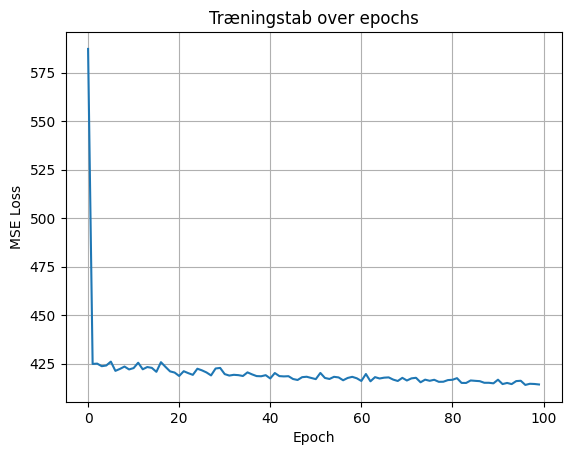

In [19]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningstab over epochs")
plt.grid(True)
plt.show()

## Træn model på billeder

### DataLoad klasse til load af billeder og csv

In [20]:
class PetFinderDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, image_dir, transform=None, max_samples=None):
        self.data = pd.read_csv(csv_file)
        if max_samples is not None:
            self.data = self.data.iloc[:max_samples].reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = f"{self.image_dir}/{row['Id']}.jpg"
        image = Image.open(img_path).convert("RGB")
        label = torch.tensor(row["Pawpularity"], dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image.flatten(), label

### Billede transformation

In [21]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


### Opret dataset

In [22]:
train_data = PetFinderDataset("data/train.csv", "data/train", transform=transform, max_samples=500)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

### NN Model til billeder

In [23]:
modelPicxCsv = nn.Sequential(
    nn.Linear(3 * 64 * 64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)


### Træn model

In [24]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(modelPicxCsv.parameters(), lr=0.001)
epochs = 10
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = modelPicxCsv(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    losses.append(epoch_loss)

c:\Users\stamm\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\stamm\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Loss: 899.7265
Epoch 2/10, Loss: 526.7672
Epoch 3/10, Loss: 484.3332
Epoch 4/10, Loss: 484.0567
Epoch 5/10, Loss: 480.0653
Epoch 6/10, Loss: 486.1440
Epoch 7/10, Loss: 477.4926
Epoch 8/10, Loss: 484.6182
Epoch 9/10, Loss: 480.5819
Epoch 10/10, Loss: 493.8112


### Visualiser Loss

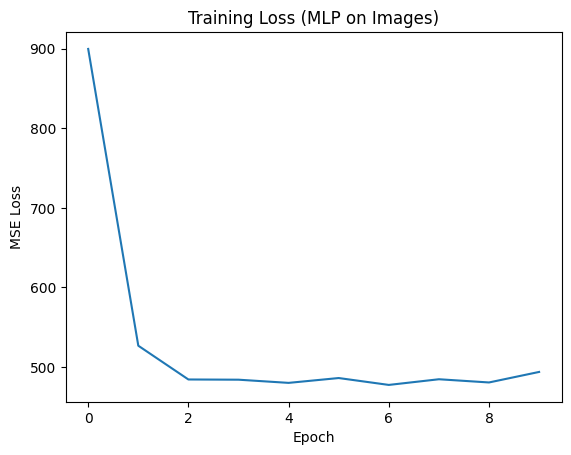

In [25]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (MLP on Images)")
plt.show()

# Uge 19 

## Her arbejdes med Convolutional Nerual Netværk på petfinder billederne

### Imports

In [94]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import os
import random

### Relevant Variables

In [107]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 40

# device bestemmer hvor modellen skal køres (CPU eller GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Import dataset

In [96]:
# Load CSV
df = pd.read_csv("Data/train.csv")  # Path to the CSV file

# sæt base_path for billeder
base_path = "Data/train/"  

# forbered image paths and labels
image_paths = [os.path.join(base_path, f"{id}.jpg") for id in df['Id']]
labels = (df['Pawpularity'] * num_classes // 101).astype(int).tolist()
image_paths = image_paths[:100]  # Begrænsning for at undgå for mange billeder ved test

# Dataset class
class PetFinderDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(label, dtype=torch.long)

# Transformations / data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomRotation(degrees=66),
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard ImageNet normalization
])

# lav dataset og dataloader
train_dataset = PetFinderDataset(image_paths=image_paths, labels=labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

### Creating CNN

In [97]:
class ConvNeuralNet(nn.Module):
    # Definerer en simpel Convolutional Neural Network (CNN) model
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dynamisk beregning af det fladede inputstørrelse
        self.flattened_size = self._get_flattened_size()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def _get_flattened_size(self):
        # Beregner størrelsen af det fladede input til det første fuldt forbundne lag
        # Dette gøres ved at køre en dummy input gennem konvolutionslagene
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 224, 224)  # Dummy input med batch size 1, 3 kanaler (RGB), 224x224 billedstørrelse
            x = self.conv_layer1(dummy_input)
            x = self.conv_layer2(x)
            x = self.max_pool1(x)
            x = self.conv_layer3(x)
            x = self.conv_layer4(x)
            x = self.max_pool2(x)
            return x.numel()

    # Definerer fremadrettet passering af data gennem netværket
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

### HyperParameter

In [98]:
model = ConvNeuralNet(num_classes)

# Set Loss function med criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer med optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

# total_step = len(train_loader)

### Træn modellen

In [ ]:
# Sørg for at modellen også er på device (GPU hvis muligt)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Flyt data til den valgte enhed (CPU eller GPU)
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        
        # Hvis labels er int64 (typisk for klassifikation), så sørg for korrekt dtype
        if labels.dtype == torch.int64 and isinstance(criterion, torch.nn.CrossEntropyLoss):
            pass  # CrossEntropyLoss kræver int64
        else:
            labels = labels.float()  # Regression eller anden loss kræver float

        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    idx = random.randint(0, images.size(0) - 1)
    plt.imshow(images[idx].cpu().numpy().transpose(1, 2, 0))
    plt.show()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

### Test Modellen

In [109]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(image_paths), 100 * correct / total))

Accuracy of the network on the 100 train images: 100.0 %


# Uge 20 + 21

## Her arbejder vi med recurrent neural network

Imports og klargøring af data

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Load og skaler data
data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# RNN kræver 3D input: (samples, sequence_length, features)
X_seq = X_scaled.reshape((X_scaled.shape[0], 10, 3))  # 10 timesteps à 3 features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# Konverter til tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


Definer RNN-modeller (LSTM og GRU)

In [34]:
class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, rnn_type="LSTM"):
        super(RNNClassifier, self).__init__()
        self.rnn_type = rnn_type
        if rnn_type == "LSTM":
            self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        elif rnn_type == "GRU":
            self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        else:
            raise ValueError("Vælg enten 'LSTM' eller 'GRU'")
        
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # brug sidste tidssteg
        out = self.fc(out)
        return self.sigmoid(out)


Trænings- og evalueringsfunktion

In [35]:
def train_model(model, train_loader, epochs=20, lr=0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {correct / total:.2f}")


Træn og evaluer LSTM og GRU

In [36]:
for rnn_type in ["LSTM", "GRU"]:
    print(f"\nTræner {rnn_type} model:")
    model = RNNClassifier(input_size=3, hidden_size=32, rnn_type=rnn_type)
    train_model(model, train_loader, epochs=20)
    evaluate_model(model, test_loader)



Træner LSTM model:
Epoch 1, Loss: 19.3415
Epoch 2, Loss: 18.7912
Epoch 3, Loss: 16.4908
Epoch 4, Loss: 9.7812
Epoch 5, Loss: 10.2009
Epoch 6, Loss: 8.4882
Epoch 7, Loss: 7.5071
Epoch 8, Loss: 7.1448
Epoch 9, Loss: 7.0952
Epoch 10, Loss: 6.2810
Epoch 11, Loss: 6.5135
Epoch 12, Loss: 6.8528
Epoch 13, Loss: 6.7154
Epoch 14, Loss: 7.0882
Epoch 15, Loss: 7.9510
Epoch 16, Loss: 5.9669
Epoch 17, Loss: 6.4372
Epoch 18, Loss: 5.8247
Epoch 19, Loss: 5.7790
Epoch 20, Loss: 5.6231
Test Accuracy: 0.95

Træner GRU model:
Epoch 1, Loss: 19.6664
Epoch 2, Loss: 18.8467
Epoch 3, Loss: 17.3206
Epoch 4, Loss: 11.8115
Epoch 5, Loss: 7.9267
Epoch 6, Loss: 8.5856
Epoch 7, Loss: 7.1754
Epoch 8, Loss: 6.8130
Epoch 9, Loss: 6.6406
Epoch 10, Loss: 6.5673
Epoch 11, Loss: 6.3598
Epoch 12, Loss: 6.3601
Epoch 13, Loss: 6.5368
Epoch 14, Loss: 6.8352
Epoch 15, Loss: 6.1143
Epoch 16, Loss: 6.2802
Epoch 17, Loss: 6.2161
Epoch 18, Loss: 5.9193
Epoch 19, Loss: 6.4845
Epoch 20, Loss: 5.8860
Test Accuracy: 0.94


Ny patient test

In [37]:
new_patient = torch.tensor(X_test[0].reshape(1, 10, 3), dtype=torch.float32)
model.eval()
with torch.no_grad():
    output = model(new_patient)
    prediction = "Kræft" if output.item() > 0.5 else "Rask"
    print("Forudsigelse:", prediction)


Forudsigelse: Kræft
